# Bank Churn Prediction


## **Objective**

1.   Data Encoding
2.   Feature Scaling
3.   Handling Imbalance Data
4.   SVM (Classifier)
5.   Grid Search for hyperparameter tuning

# Data Source

Kaggle
   
    
     
      kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset

# Import Libarary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df=pd.read_csv("Churn_Modelling.csv")

# Describe Data

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [6]:
df.duplicated('CustomerId').sum()

0

In [9]:
df=df.drop("RowNumber",axis=1)

In [10]:
df=df.set_index('CustomerId')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [17]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [18]:
df.replace({'NumOfProducts':{1:0,2:1,3:1,4:1}},inplace=True)

In [19]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [20]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [28]:
df.loc[(df['Balance']==0), 'Exited'].value_counts()

Exited
0    3117
1     500
Name: count, dtype: int64

In [23]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

# Data Visualisation

<Axes: >

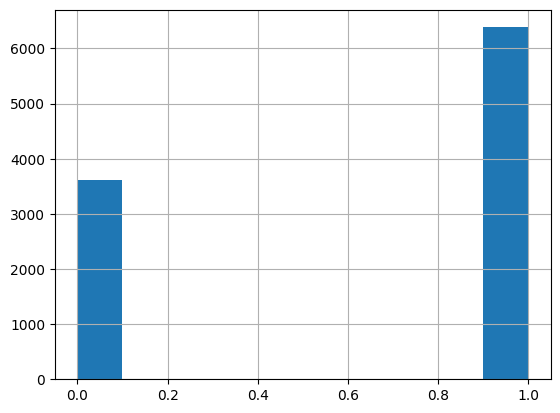

In [24]:
df['Zero Balance'].hist()

In [29]:
df.groupby(['Exited','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Exited Geography                                                        
0      0             2064         2064    2064  2064    2064     2064   
       1             1695         1695    1695  1695    1695     1695   
       2             4204         4204    4204  4204    4204     4204   
1      0              413          413     413   413     413      413   
       1              814          814     814   814     814      814   
       2              810          810     810   810     810      810   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Exited Geography                                                              
0      0                   2064       2064            2064             2064   
       1                   1695       1695            1695             1695   
       2                   4204       4204            4204             4204   
1      0                    413        413             413              413   
       1                    814        814             814              814   
       2                    810        810             810              810   

                  Zero Balance  
Exited Geography                
0      0                  2064  
       1                  1695  
       2                  4204  
1      0                   413  
       1                   814  
       2                   810

<Axes: xlabel='Exited', ylabel='count'>

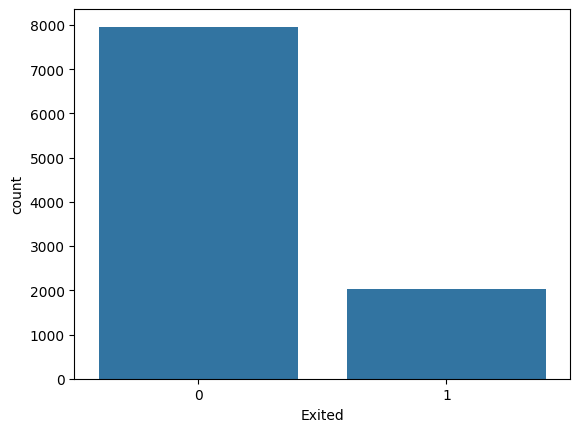

In [34]:
sns.countplot(x='Exited',data=df)

# Define Target Variable (y) and Feature Variables (X)

In [30]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [31]:
x=df.drop(['Surname','Exited'],axis=1)

In [32]:
y=df['Exited']

In [33]:
x.shape,y.shape

((10000, 11), (10000,))

In [35]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
rus=RandomUnderSampler(random_state=2529)

In [38]:
x_rus,y_rus=rus.fit_resample(x,y)

In [39]:
x_rus.shape,y_rus.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [40]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [41]:
y_rus.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

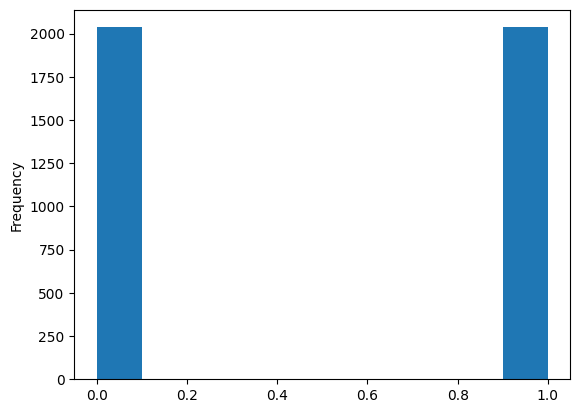

In [42]:
y_rus.plot(kind='hist')

In [44]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=2529)
x_ros,y_ros=ros.fit_resample(x,y)
x_ros.shape,y_ros.shape

((15926, 11), (15926,))

In [46]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [47]:
y_ros.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

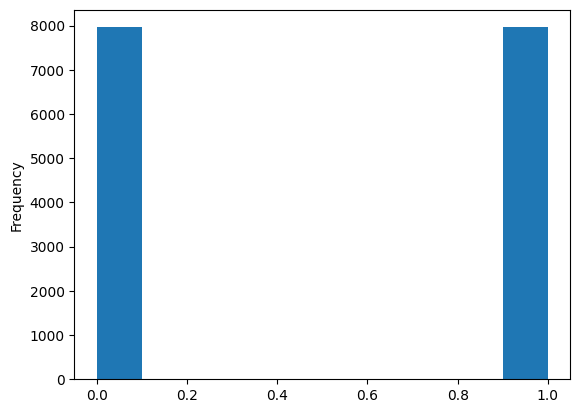

In [48]:
y_ros.plot(kind='hist')

# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [52]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus=train_test_split(x_rus,y_rus,test_size=0.3,random_state=25)

In [53]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=25)

In [54]:
#standardizing features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [55]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Zero Balance'],
      dtype='object')

In [57]:
x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [58]:
x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [59]:
x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [60]:
x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [61]:
x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

In [62]:
x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']]=sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','EstimatedSalary']])

# Support Vector Machine

In [64]:
from sklearn.svm import SVC
svc=SVC()

In [65]:
svc.fit(x_train,y_train)

SVC()

In [66]:
y_pred=svc.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]])

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [70]:
svc.fit(x_train_rus,y_train_rus)

SVC()

In [73]:
y_pred_rus=svc.predict(x_test_rus)

In [74]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[483, 120],
       [172, 448]])

In [75]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [76]:
svc.fit(x_train_ros,y_train_ros)

SVC()

In [77]:
y_pred_ros=svc.predict(x_test_ros)

In [78]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1854,  572],
       [ 551, 1801]])

In [79]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778

